In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#load the dataset
weather_data = pd.read_csv(r'E:\NumPy\weather-analysis-NumPy\data\weather.csv')

# Display the first few rows to understand the structure
print(weather_data.head())




         Date  Temperature (C)  Humidity (%)  Wind Speed (km/h)  \
0  2023-01-01         9.981605     83.578612           2.584086   
1  2023-01-02        33.028572     36.769332          26.567732   
2  2023-01-03        24.279758     30.142641          27.031756   
3  2023-01-04        18.946339     54.261693          31.871495   
4  2023-01-05         1.240746     88.995532          36.304567   

   Rainfall (mm)  Pressure (hPa)  
0       7.771469     1012.534026  
1       5.584042     1014.178855  
2       4.242220     1012.655157  
3       9.063544     1011.330538  
4       1.111975     1011.809538  


In [2]:
#convert relevant columns to NumPy arrays
temperature = weather_data['Temperature (C)'].values
humidity = weather_data['Humidity (%)'].values
wind_speed = weather_data['Wind Speed (km/h)'].values
rainfall = weather_data['Rainfall (mm)'].values
pressure = weather_data['Pressure (hPa)'].values

In [3]:
# now time to clean Data
#Check Missing Values
print("Missing values in each column before cleaning:")
print(weather_data.isnull().sum())
# If there are no missing values, proceed without filling NaNs
if weather_data.isnull().sum().sum() == 0:
    print("\nNo missing values found. No need for imputation.")
else:
    # Replace NaN values with the mean of the respective columns
    weather_data.fillna(weather_df.mean(), inplace=True)
    print("\nMissing values after cleaning:")
    print(weather_data.isnull().sum())

# Proceed with your analysis or any further data processing...

Missing values in each column before cleaning:
Date                 0
Temperature (C)      0
Humidity (%)         0
Wind Speed (km/h)    0
Rainfall (mm)        0
Pressure (hPa)       0
dtype: int64

No missing values found. No need for imputation.


In [4]:
# Calculate the mean, median, and standard deviation of all columns
#mean_temp = np.mean(temperature)
#median_temp = np.median(temperature)
#std_temp = np.std(temperature)

#mean_humd = np.mean(humidity)
#median_humd = np.median(humidity)
#std_humd = np.std(humidity)

#mean_windSp = np.mean(wind_speed)
#median_windSp = np.median(wind_speed)
#std_windSp = np.std(wind_speed)

#mean_rainf = np.mean(rainfall)
#median_rainf = np.median(rainfall)
#std_rainf = np.std(rainfall)

#mean_press = np.mean(pressure)
#median_press = np.median(pressure)
#std_press = np.std(pressure)

for column in weather_data.select_dtypes(include=[np.number]).columns:
    mean_value = np.mean(weather_data[column])
    median_value = np.median(weather_data[column])
    std_value = np.std(weather_data[column])

    print(f"\n{column} Statistics:")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Standard Deviation: {std_value}")
    



Temperature (C) Statistics:
Mean: 13.915485387980262
Median: 12.924449559132746
Standard Deviation: 11.821627403980235

Humidity (%) Statistics:
Mean: 56.226544444123455
Median: 58.920072592023445
Standard Deviation: 20.330715897840502

Wind Speed (km/h) Statistics:
Mean: 24.80762404309202
Median: 25.20971577569862
Standard Deviation: 15.0166140758967

Rainfall (mm) Statistics:
Mean: 5.25510524842756
Median: 5.3189873771521015
Standard Deviation: 3.0311882193884547

Pressure (hPa) Statistics:
Mean: 1016.9180677819892
Median: 1016.5309584109991
Standard Deviation: 4.114821246553488


In [5]:
# Handling OutLiers
# Define outlier thresholds for each column
outlier_thresholds = {
    'Temperature (C)' : (-5,35),   # temperatures between -5°C and 35°C
    'Humidity (%)': (20, 90),      # humidity between 20% and 90%
    'Wind Speed (km/h)': (0, 50),  # wind speed between 0 km/h and 50 km/h
    'Rainfall (mm)': (0, 10),      # rainfall between 0 mm and 10 mm
    'Pressure (hPa)': (1010, 1025) # pressure between 1010 hPa and 1025 hPa
}
# handle outliers for each column
for column,(lower,upper) in outlier_thresholds.items():
    weather_data  = weather_data[(weather_data[column]>=lower) & (weather_data[column]<=upper)]

# Display the dataset
print(weather_data.head())
    

         Date  Temperature (C)  Humidity (%)  Wind Speed (km/h)  \
0  2023-01-01         9.981605     83.578612           2.584086   
1  2023-01-02        33.028572     36.769332          26.567732   
2  2023-01-03        24.279758     30.142641          27.031756   
3  2023-01-04        18.946339     54.261693          31.871495   
4  2023-01-05         1.240746     88.995532          36.304567   

   Rainfall (mm)  Pressure (hPa)  
0       7.771469     1012.534026  
1       5.584042     1014.178855  
2       4.242220     1012.655157  
3       9.063544     1011.330538  
4       1.111975     1011.809538  


In [6]:
# normalizing the dataset

#standard technique

#temperature_min = np.min(temperature)
#temperature_max = np.max(temperature)
#normalized_temp = (temperature - temperature_min) / (temperature_max - temperature_min)

#wind_speed_min = np.min(wind_speed)
#wind_speed_max = np.max(wind_speed)
#normalized_wind_speed = (wind_speed - wind_speed_min) / (wind_speed_max - wind_speed_min)

#humidity_min = np.min(humidity)
#humidity_max = np.max(humidity)
#normalized_humidity = (humidity - humidity_min) / (humidity_max - humidity_min)

#rainfall_min = np.min(rainfall)
#rainfall_max = np.max(rainfall)
#normalized_rainfall = (rainfall - rainfall_min) / (rainfall_max - rainfall_min)

#pressure_min = np.min(pressure)
#pressure_max = np.max(pressure)
#normalized_pressure = (pressure - pressure_min) / (pressure_max - pressure_min)


#best practices

columns_to_normalize = ['Temperature (C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Rainfall (mm)', 'Pressure (hPa)']
normalized_weather_data = weather_data.copy()

#apply Min-Max normalization
for column in columns_to_normalize:
    column_min = np.min(normalized_weather_data[column])
    column_max = np.max(normalized_weather_data[column])
    normalized_weather_data[column] = (normalized_weather_data[column] - column_min) / (column_max - column_min)

# Print the first few rows of the normalized data
print(normalized_weather_data.head())

# If you want to see just the normalized columns
print(normalized_weather_data[columns_to_normalize].head())
    

         Date  Temperature (C)  Humidity (%)  Wind Speed (km/h)  \
0  2023-01-01         0.376025      0.916966           0.041692   
1  2023-01-02         0.963140      0.238073           0.531320   
2  2023-01-03         0.740267      0.141964           0.540793   
3  2023-01-04         0.604399      0.491772           0.639597   
4  2023-01-05         0.153354      0.995530           0.730098   

   Rainfall (mm)  Pressure (hPa)  
0       0.774809        0.153485  
1       0.553491        0.266545  
2       0.417729        0.161812  
3       0.905538        0.070762  
4       0.101019        0.103687  
   Temperature (C)  Humidity (%)  Wind Speed (km/h)  Rainfall (mm)  \
0         0.376025      0.916966           0.041692       0.774809   
1         0.963140      0.238073           0.531320       0.553491   
2         0.740267      0.141964           0.540793       0.417729   
3         0.604399      0.491772           0.639597       0.905538   
4         0.153354      0.995530     

In [7]:
# now performing Correlation analysis
# Select numeric columns for correlation analysis
corr_columns = ['Temperature (C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Rainfall (mm)', 'Pressure (hPa)']

#calculate the correlation matrix
corr_matrix = weather_data[corr_columns].corr()

# Print the correlation matrix
print("Correlation Matrix: ")
print(corr_matrix)

# Find the pair with the maximum correlation
max_corr = corr_matrix.abs().unstack().sort_values(ascending = False)

#Filter out self correlations
max_corr = max_corr[max_corr<1]

#Display the pair with the highest correlation
print("\nMaximum Correlations:")
print(max_corr.head(1))


Correlation Matrix: 
                   Temperature (C)  Humidity (%)  Wind Speed (km/h)  \
Temperature (C)           1.000000      0.035691          -0.136410   
Humidity (%)              0.035691      1.000000          -0.036775   
Wind Speed (km/h)        -0.136410     -0.036775           1.000000   
Rainfall (mm)            -0.022216     -0.074328           0.009646   
Pressure (hPa)           -0.040326      0.058711           0.017802   

                   Rainfall (mm)  Pressure (hPa)  
Temperature (C)        -0.022216       -0.040326  
Humidity (%)           -0.074328        0.058711  
Wind Speed (km/h)       0.009646        0.017802  
Rainfall (mm)           1.000000       -0.022187  
Pressure (hPa)         -0.022187        1.000000  

Maximum Correlations:
Wind Speed (km/h)  Temperature (C)    0.13641
dtype: float64


In [8]:
#Let’s say you want to analyze the data by month or season. You can calculate monthly or seasonal averages.
#Aggregate the Data

# Convert the 'Date' column to datetime format
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Extract the month from the 'Date' column
weather_data['Month'] = weather_data['Date'].dt.month

# Optionally, define seasons based on the month

def define_seasons(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'

# Add a 'Season' column
weather_data['Season'] = weather_data['Month'].apply(define_seasons)

#Select numeric columns for aggregation
numeric_columns = weather_data.select_dtypes(include = ['number']).columns

# Now, let's calculate the monthly averages for each column
monthly_avg = weather_data.groupby('Month')[numeric_columns].mean()

# Calculate seasonal averages
seasonal_avg = weather_data.groupby('Season')[numeric_columns].mean()

# print all monthly averages
print("Monthly Averages: ")
print(monthly_avg)

# Print the seasonal averages
print("\nSeasonal Averages:")
print(seasonal_avg)
        
        
    

Monthly Averages: 
       Temperature (C)  Humidity (%)  Wind Speed (km/h)  Rainfall (mm)  \
Month                                                                    
1            12.761888     52.490642          24.968908       5.124471   
2            14.941790     56.628697          21.107671       5.821049   
3            14.084013     54.539078          24.512806       5.939034   
4            14.651179     62.331741          29.143458       4.969595   
5            13.239814     55.350153          24.063065       4.440663   

       Pressure (hPa)  Month  
Month                         
1         1016.165884    1.0  
2         1016.522436    2.0  
3         1017.021277    3.0  
4         1017.037798    4.0  
5         1017.838201    5.0  

Seasonal Averages:
        Temperature (C)  Humidity (%)  Wind Speed (km/h)  Rainfall (mm)  \
Season                                                                    
Spring        13.992683     57.375475          25.891128        5.12547   


In [9]:
# now lets tackle a real world problem in this dataset..
# a Heat Stress Index (HSI), which is commonly used in fields like meteorology, health, and agriculture
weather_data['Heat_Stress_Index'] = (
    weather_data['Temperature (C)'] + 0.55 * (0.61 * weather_data['Humidity (%)']) - 14.5   
     #Heat Stress Index (HSI) Formula:
     #We’ll use a simplified version of the formula:
     #\text{HSI} = \text{Temperature (C)} + 0.55 \times (0.61 \times \text{Humidity (%)}) - 14.5
    #This formula factors in both temperature and humidity to quantify how "hot" it actually feels to humans.                                                                                  
)

# Check the first few values to ensure the calculation worked
print("Heat Stress Index (First 5 rows): ")
print(weather_data[['Temperature (C)','Humidity (%)','Heat_Stress_Index']].head())

# Analyze the HSI
high_stress_days = weather_data[weather_data['Heat_Stress_Index']>30] # Days with HSI > 30 are uncomfortable
print(f"\nNumber of High-Stress Days: {len(high_stress_days)}")

# Find the day with the highest Heat Stress Index
most_stressful_day = weather_data.loc[weather_data['Heat_Stress_Index'].idxmax()]
print(f"\nDay with the highest Heat Stress Index:\n{most_stressful_day}")


Heat Stress Index (First 5 rows): 
   Temperature (C)  Humidity (%)  Heat_Stress_Index
0         9.981605     83.578612          23.522229
1        33.028572     36.769332          30.864683
2        24.279758     30.142641          19.892614
3        18.946339     54.261693          22.651137
4         1.240746     88.995532          16.598747

Number of High-Stress Days: 33

Day with the highest Heat Stress Index:
Date                 2023-03-11 00:00:00
Temperature (C)                34.475477
Humidity (%)                   79.445639
Wind Speed (km/h)               3.468065
Rainfall (mm)                   1.504169
Pressure (hPa)               1014.276428
Month                                  3
Season                            Spring
Heat_Stress_Index              46.629489
Name: 69, dtype: object


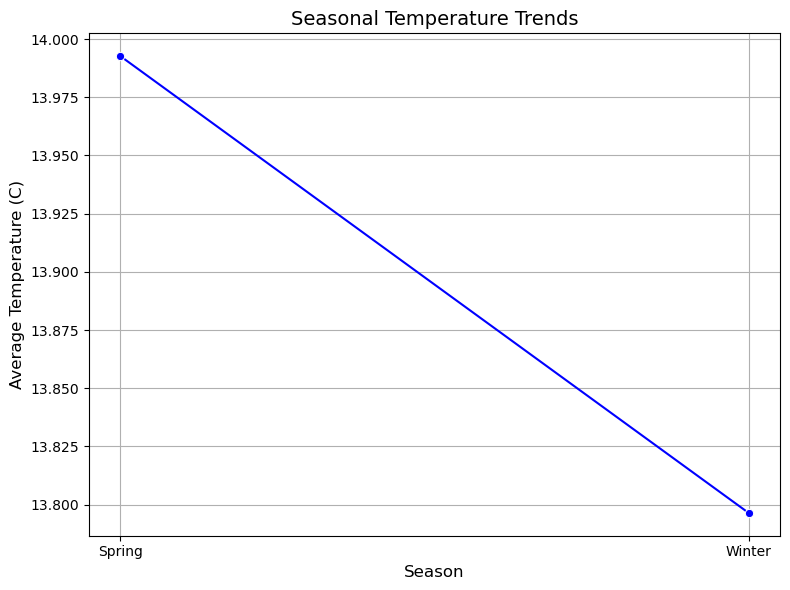

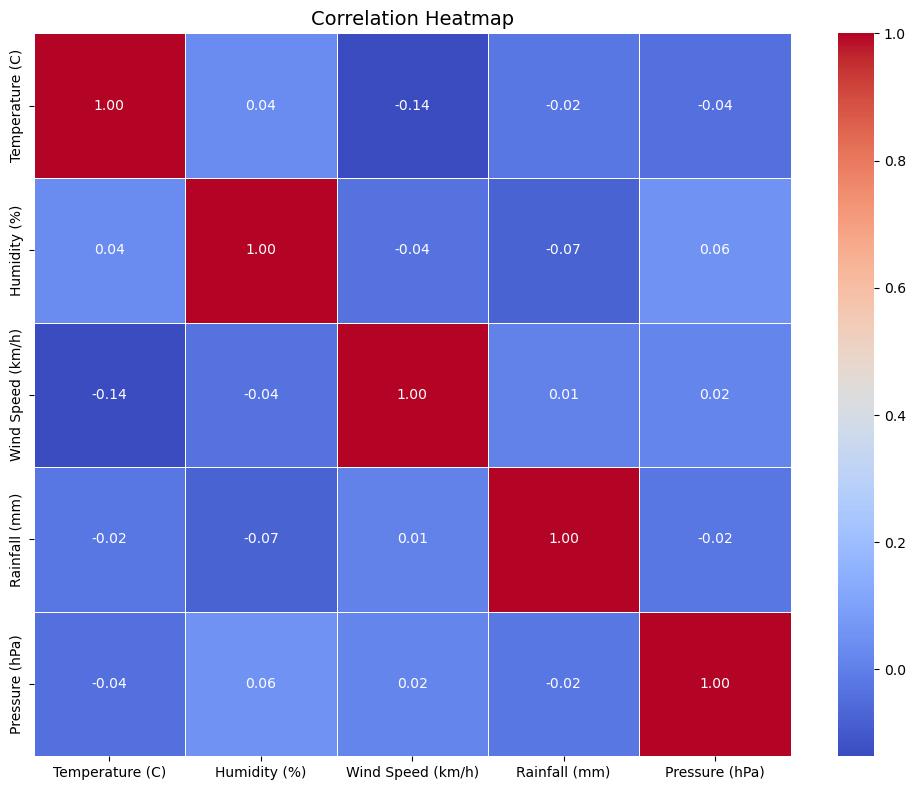

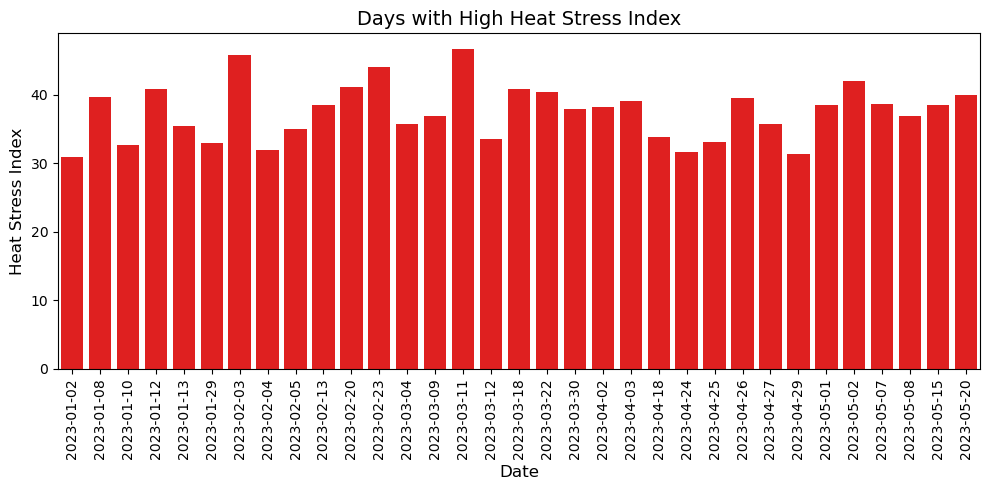

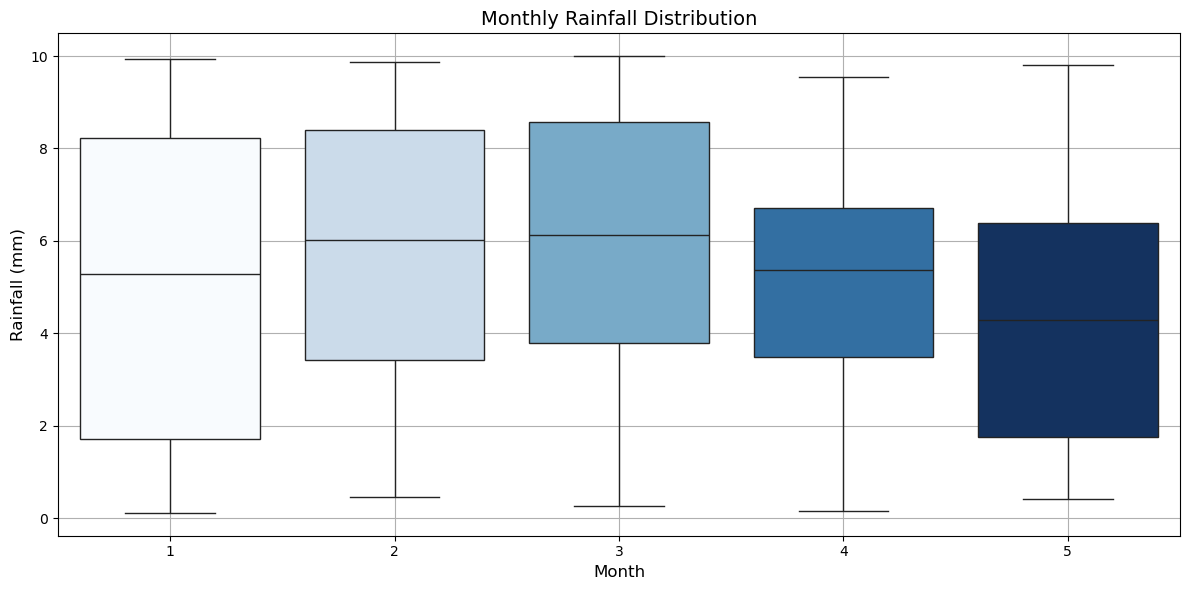

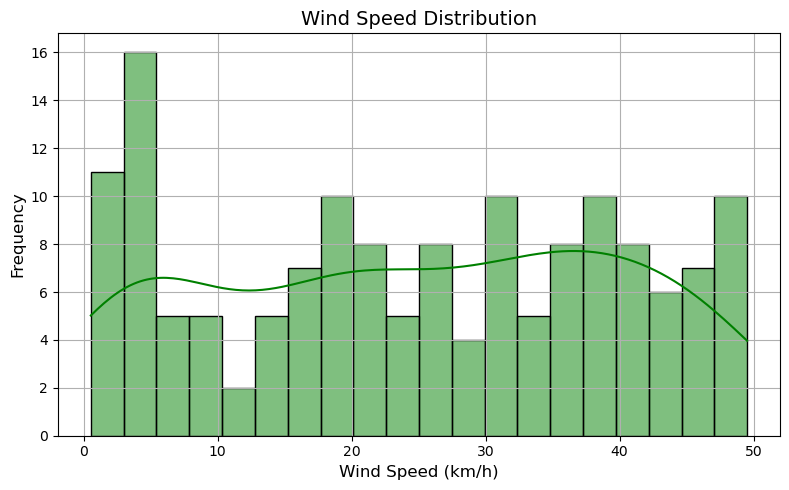

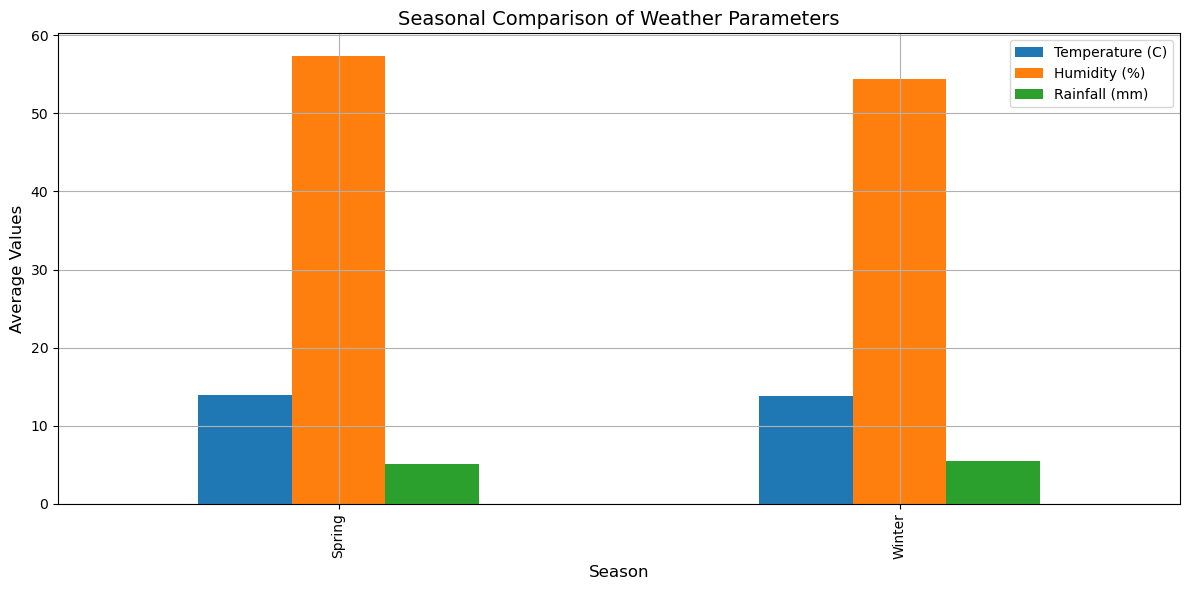

In [26]:
output_folder = r"E:\NumPy\weather-analysis-NumPy\outputs\Visualizations"
def validate_weather_data_columns(weather_data, required_columns):
    missing_columns = [col for col in required_columns if col not in weather_data.columns]
    if missing_columns:
        raise ValueError(f"The following required columns are missing from the data: {missing_columns}")
        
# For visualization purposes
def plot_seasonal_temperature_trends(weather_data):
    """
    Plots the seasonal average temperature trends.

    Parameters:
        weather_data (DataFrame): Data containing seasonal weather information.
    """
    required_columns = ['Season', 'Temperature (C)']
    validate_weather_data_columns(weather_data, required_columns)
    
    seasonal_avg = weather_data.groupby('Season')['Temperature (C)'].mean()
    plt.figure(figsize=(8,6))
    sns.lineplot(data=seasonal_avg, marker='o', color='b')
    plt.title('Seasonal Temperature Trends',fontsize=14)
    plt.xlabel('Season',fontsize=12)
    plt.ylabel('Average Temperature (C)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{output_folder}/seasonal_temperature_trends.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
    plt.show()
    
def plot_correlation_heatmap(weather_data):
    """
    Plots a heatmap showing correlations between key weather parameters.

    Parameters:
        weather_data (DataFrame): Data containing weather information.
    """
    corr_columns = ['Temperature (C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Rainfall (mm)', 'Pressure (hPa)']
    validate_weather_data_columns(weather_data, corr_columns)

    corr_matrix = weather_data[corr_columns].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm' , fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{output_folder}/correlation.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
    plt.show()


def plot_high_hsi_days(weather_data):
    """
    Plots a bar chart for days with high Heat Stress Index.

    Parameters:
        weather_data (DataFrame): Data containing weather and Heat Stress Index information.
    """
    required_columns = ['Date' , 'Heat_Stress_Index']
    validate_weather_data_columns(weather_data, required_columns)

    high_stress_days = weather_data[weather_data['Heat_Stress_Index'] > 30]
    plt.figure(figsize=(10, 5))
    sns.barplot(x=high_stress_days['Date'], y=high_stress_days['Heat_Stress_Index'],color='r')
    plt.xticks(rotation=90)
    plt.title('Days with High Heat Stress Index', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Heat Stress Index', fontsize=12)
    plt.tight_layout()
    plt.savefig(f"{output_folder}/high_hsi_days.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
    plt.show()

def plot_monthly_rainfall_distribution(weather_data):
    """
    Plots a boxplot showing the distribution of rainfall by month.

    Parameters:
        weather_data (DataFrame): Data containing monthly rainfall information.
    """
    required_columns = ['Month', 'Rainfall (mm)']
    validate_weather_data_columns(weather_data, required_columns)

    plt.figure(figsize = (12,6))
    sns.boxplot(x='Month', y='Rainfall (mm)', data=weather_data, hue='Month', palette='Blues', legend=False)
    plt.title('Monthly Rainfall Distribution' , fontsize = 14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Rainfall (mm)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{output_folder}/monthly_rainfall_distribution.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
    plt.show()

def plot_wind_speed_distribution(weather_data):
    """
    Plots a histogram of wind speed distribution.

    Parameters:
        weather_data (DataFrame): Data containing wind speed information.
    """

    required_columns = ['Wind Speed (km/h)']
    validate_weather_data_columns(weather_data, required_columns)

    plt.figure(figsize = (8, 5))
    sns.histplot(weather_data['Wind Speed (km/h)'], bins=20, color='g', kde=True)
    plt.title('Wind Speed Distribution', fontsize=14)
    plt.xlabel('Wind Speed (km/h)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{output_folder}/wind_speed_distribution.jpg",format='jpg', dpi=300, bbox_inches='tight')
    plt.show()

def plot_seasonal_comparison(weather_data):
    """
    Plots a bar chart comparing seasonal averages of multiple weather parameters.

    Parameters:
        weather_data (DataFrame): Data containing seasonal weather information.
    """

    required_columns = ['Season','Temperature (C)','Humidity (%)','Rainfall (mm)']
    validate_weather_data_columns(weather_data, required_columns)

    seasonal_avg = weather_data.groupby('Season')[['Temperature (C)', 'Humidity (%)', 'Rainfall (mm)']].mean()
    seasonal_avg.plot(kind = 'bar', figsize=(12,6))
    plt.title('Seasonal Comparison of Weather Parameters', fontsize=14)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Average Values', fontsize=12)
    plt.legend(loc='upper right', fontsize =10)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{output_folder}/seasonal_comparisons.jpg",format='jpg', dpi=300, bbox_inches='tight')
    plt.show()

try:
    plot_seasonal_temperature_trends(weather_data)
    plot_correlation_heatmap(weather_data)
    plot_high_hsi_days(weather_data)
    plot_monthly_rainfall_distribution(weather_data)
    plot_wind_speed_distribution(weather_data)
    plot_seasonal_comparison(weather_data)
except ValueError as e:
    print(e)

     

In [11]:
# Save the processed DataFrame
output_file = r"E:\NumPy\weather-analysis-NumPy\outputs\Results\processed_data.csv"
weather_data.to_csv(output_file, index=False)

print(f"Processed data has been saved to '{output_file}' successfully!")

# Optionally, preview the saved data
saved_data = pd.read_csv(output_file)
print("\nPreview of the saved data:")
print(saved_data.head())